In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import re
import numpy as np
import seaborn as sns

In [5]:
df_budget = pd.read_excel("budget_gridsearch_fairness_results.xlsx")

In [6]:
column_names = df_budget.columns.tolist()
print("\nColumn Names:")
for i, col_name in enumerate(column_names):
    print(f"{i+1}. {col_name}")


Column Names:
1. Budget (N)
2. Accuracy
3. Demographic_Parity_Disparity_age_bin
4. Equalized_Odds_Disparity_age_bin
5. Predictive_Parity_Disparity_age_bin
6. Demographic_Parity_Disparity_race
7. Equalized_Odds_Disparity_race
8. Predictive_Parity_Disparity_race
9. Demographic_Parity_Disparity_sex
10. Equalized_Odds_Disparity_sex
11. Predictive_Parity_Disparity_sex
12. Demographic_Parity_age_bin_25-34
13. Demographic_Parity_age_bin_35-44
14. Demographic_Parity_age_bin_45-54
15. Demographic_Parity_age_bin_55-64
16. Demographic_Parity_age_bin_65plus
17. Demographic_Parity_age_bin_lt25
18. Demographic_Parity_race_Amer-Indian-Eskimo
19. Demographic_Parity_race_Asian-Pac-Islander
20. Demographic_Parity_race_Black
21. Demographic_Parity_race_Other
22. Demographic_Parity_race_White
23. Demographic_Parity_sex_Female
24. Demographic_Parity_sex_Male
25. Equalized_Odds_age_bin_25-34
26. Equalized_Odds_age_bin_35-44
27. Equalized_Odds_age_bin_45-54
28. Equalized_Odds_age_bin_55-64
29. Equalized_Odd

Generating Age Disparities & Accuracy plot...


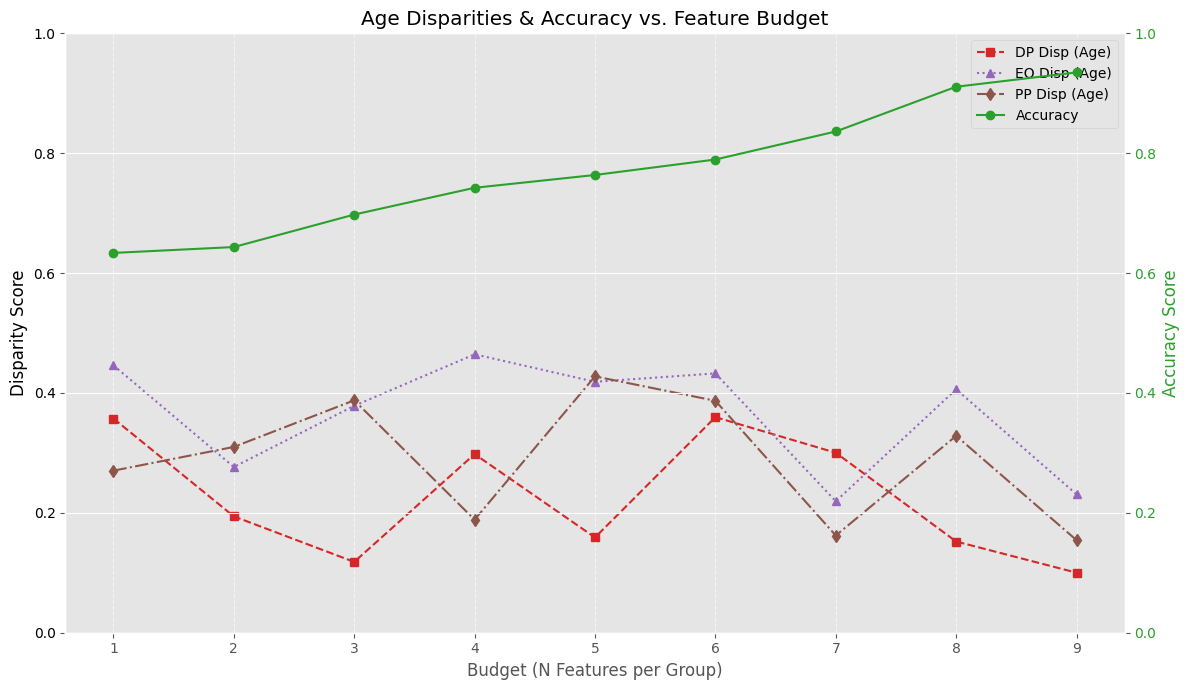

Age Disparities & Accuracy plot generation complete.

Generating Race Disparities & Accuracy plot...


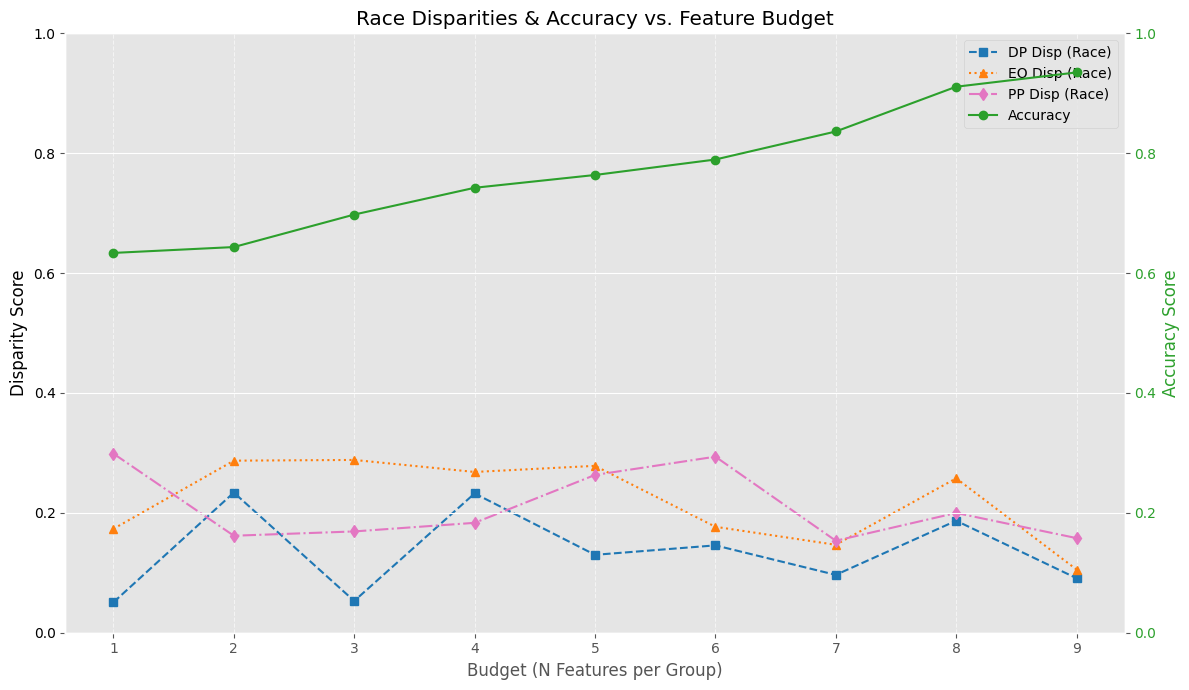

Race Disparities & Accuracy plot generation complete.

Generating Sex Disparities & Accuracy plot...


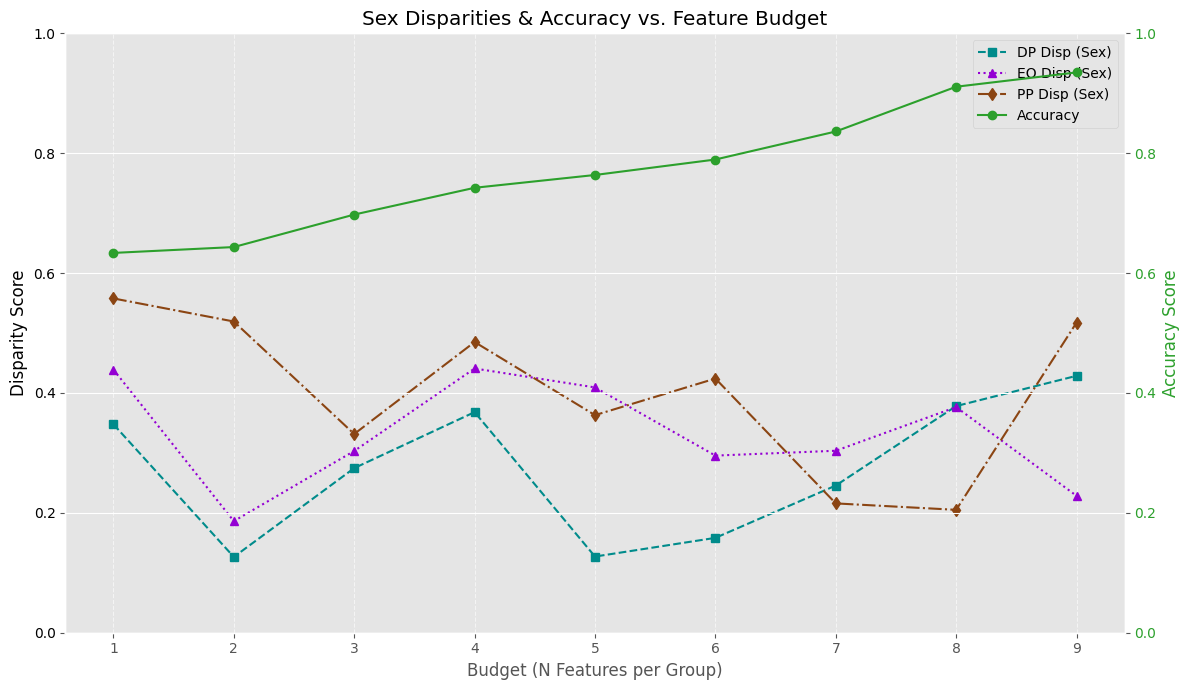

Sex Disparities & Accuracy plot generation complete.

All combined plot generations complete.


In [43]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np # For dummy data

# --- Assume df_budget is loaded and preprocessed ---
# For demonstration, let's create a dummy df_budget with budget up to 10
budget_values = list(range(1, 10)) # Budget from 1 to 10
data = {
    'Budget (N)': budget_values,
    'Accuracy': np.linspace(0.6, 0.9, len(budget_values)) + np.random.rand(len(budget_values)) * 0.05, # More dynamic
    'Demographic_Parity_Disparity_age_bin': np.random.rand(len(budget_values)) * 0.3 + 0.1,
    'Equalized_Odds_Disparity_age_bin': np.random.rand(len(budget_values)) * 0.3 + 0.2,
    'Predictive_Parity_Disparity_age_bin': np.random.rand(len(budget_values)) * 0.3 + 0.15,
    'Demographic_Parity_Disparity_race': np.random.rand(len(budget_values)) * 0.2 + 0.05,
    'Equalized_Odds_Disparity_race': np.random.rand(len(budget_values)) * 0.2 + 0.1,
    'Predictive_Parity_Disparity_race': np.random.rand(len(budget_values)) * 0.2 + 0.15,
    'Demographic_Parity_Disparity_sex': np.random.rand(len(budget_values)) * 0.4 + 0.1,
    'Equalized_Odds_Disparity_sex': np.random.rand(len(budget_values)) * 0.4 + 0.05,
    'Predictive_Parity_Disparity_sex': np.random.rand(len(budget_values)) * 0.4 + 0.2,
}
df_budget = pd.DataFrame(data)
# Ensure accuracy doesn't exceed 1.0 for the dummy data
df_budget['Accuracy'] = df_budget['Accuracy'].clip(upper=1.0)


# --- Configuration ---
budget_col = 'Budget (N)'
accuracy_col = 'Accuracy'
reverse_budget_axis = False

# Define disparity column names
dp_disp_age_col = 'Demographic_Parity_Disparity_age_bin'
eo_disp_age_col = 'Equalized_Odds_Disparity_age_bin'
pp_disp_age_col = 'Predictive_Parity_Disparity_age_bin'
dp_disp_race_col = 'Demographic_Parity_Disparity_race'
eo_disp_race_col = 'Equalized_Odds_Disparity_race'
pp_disp_race_col = 'Predictive_Parity_Disparity_race'
dp_disp_sex_col = 'Demographic_Parity_Disparity_sex'
eo_disp_sex_col = 'Equalized_Odds_Disparity_sex'
pp_disp_sex_col = 'Predictive_Parity_Disparity_sex'

# List of all columns needed for checks
required_cols_budget = [
    budget_col, accuracy_col,
    dp_disp_age_col, eo_disp_age_col, pp_disp_age_col,
    dp_disp_race_col, eo_disp_race_col, pp_disp_race_col,
    dp_disp_sex_col, eo_disp_sex_col, pp_disp_sex_col
]

# --- Check for required columns ---
missing_cols_budget = [col for col in required_cols_budget if col not in df_budget.columns]
if missing_cols_budget:
    print(f"Error: The following required columns are missing from the Budgeting DataFrame: {missing_cols_budget}")
    exit()

# Markers and linestyles for disparity metrics
disp_markers = ['s', '^', 'd']
disp_linestyles = ['--', ':', '-.']
accuracy_marker = 'o'
accuracy_linestyle = '-'
accuracy_color = 'tab:green' # Distinct color for accuracy

plot_figsize = (12, 7) # Slightly wider for dual axes
common_xlabel = 'Budget (N Features per Group)'
disparity_ylabel = 'Disparity Score'
accuracy_ylabel = 'Accuracy Score'

# --- Plot 1: Age Disparities & Accuracy ---
print("Generating Age Disparities & Accuracy plot...")
fig_age, ax1_age = plt.subplots(figsize=plot_figsize)

# Plot Disparities on ax1
color_dp_age = 'tab:red'
color_eo_age = 'tab:purple'
color_pp_age = 'tab:brown'

l1 = ax1_age.plot(df_budget[budget_col], df_budget[dp_disp_age_col], marker=disp_markers[0], linestyle=disp_linestyles[0], label='DP Disp (Age)', color=color_dp_age)
l2 = ax1_age.plot(df_budget[budget_col], df_budget[eo_disp_age_col], marker=disp_markers[1], linestyle=disp_linestyles[1], label='EO Disp (Age)', color=color_eo_age)
l3 = ax1_age.plot(df_budget[budget_col], df_budget[pp_disp_age_col], marker=disp_markers[2], linestyle=disp_linestyles[2], label='PP Disp (Age)', color=color_pp_age)
ax1_age.set_xlabel(common_xlabel)
ax1_age.set_ylabel(disparity_ylabel, color='black') # Main Y-axis label
ax1_age.tick_params(axis='y', labelcolor='black')
ax1_age.set_ylim(0.0, 1.0)
ax1_age.grid(True, linestyle='--', alpha=0.6)
ax1_age.set_xticks(df_budget[budget_col])

# Create a second y-axis for Accuracy
ax2_age = ax1_age.twinx()
l4 = ax2_age.plot(df_budget[budget_col], df_budget[accuracy_col], marker=accuracy_marker, linestyle=accuracy_linestyle, label=accuracy_col, color=accuracy_color)
ax2_age.set_ylabel(accuracy_ylabel, color=accuracy_color)
ax2_age.tick_params(axis='y', labelcolor=accuracy_color)
ax2_age.set_ylim(0.0, 1.0) # Or a more focused range like (0.5, 1.0) if applicable

# Combine legends
lines_age = l1+l2+l3+l4
labels_age = [l.get_label() for l in lines_age]
ax1_age.legend(lines_age, labels_age, loc='best')

ax1_age.set_title('Age Disparities & Accuracy vs. Feature Budget')
if reverse_budget_axis:
    ax1_age.set_xlim(df_budget[budget_col].max() + 1, df_budget[budget_col].min() - 1) # Adjusted for up to 10
plt.tight_layout()
plt.show()
print("Age Disparities & Accuracy plot generation complete.\n")


# --- Plot 2: Race Disparities & Accuracy ---
print("Generating Race Disparities & Accuracy plot...")
fig_race, ax1_race = plt.subplots(figsize=plot_figsize)

# Plot Disparities on ax1
color_dp_race = 'tab:blue'
color_eo_race = 'tab:orange'
color_pp_race = 'tab:pink'

l1 = ax1_race.plot(df_budget[budget_col], df_budget[dp_disp_race_col], marker=disp_markers[0], linestyle=disp_linestyles[0], label='DP Disp (Race)', color=color_dp_race)
l2 = ax1_race.plot(df_budget[budget_col], df_budget[eo_disp_race_col], marker=disp_markers[1], linestyle=disp_linestyles[1], label='EO Disp (Race)', color=color_eo_race)
l3 = ax1_race.plot(df_budget[budget_col], df_budget[pp_disp_race_col], marker=disp_markers[2], linestyle=disp_linestyles[2], label='PP Disp (Race)', color=color_pp_race)
ax1_race.set_xlabel(common_xlabel)
ax1_race.set_ylabel(disparity_ylabel, color='black')
ax1_race.tick_params(axis='y', labelcolor='black')
ax1_race.set_ylim(0.0, 1.0)
ax1_race.grid(True, linestyle='--', alpha=0.6)
ax1_race.set_xticks(df_budget[budget_col])

# Create a second y-axis for Accuracy
ax2_race = ax1_race.twinx()
l4 = ax2_race.plot(df_budget[budget_col], df_budget[accuracy_col], marker=accuracy_marker, linestyle=accuracy_linestyle, label=accuracy_col, color=accuracy_color)
ax2_race.set_ylabel(accuracy_ylabel, color=accuracy_color)
ax2_race.tick_params(axis='y', labelcolor=accuracy_color)
ax2_race.set_ylim(0.0, 1.0)

# Combine legends
lines_race = l1+l2+l3+l4
labels_race = [l.get_label() for l in lines_race]
ax1_race.legend(lines_race, labels_race, loc='best')

ax1_race.set_title('Race Disparities & Accuracy vs. Feature Budget')
if reverse_budget_axis:
    ax1_race.set_xlim(df_budget[budget_col].max() + 1, df_budget[budget_col].min() - 1)
plt.tight_layout()
plt.show()
print("Race Disparities & Accuracy plot generation complete.\n")

# --- Plot 3: Sex Disparities & Accuracy ---
print("Generating Sex Disparities & Accuracy plot...")
fig_sex, ax1_sex = plt.subplots(figsize=plot_figsize)

# Plot Disparities on ax1
color_dp_sex = 'darkcyan'
color_eo_sex = 'darkviolet'
color_pp_sex = 'saddlebrown'

l1 = ax1_sex.plot(df_budget[budget_col], df_budget[dp_disp_sex_col], marker=disp_markers[0], linestyle=disp_linestyles[0], label='DP Disp (Sex)', color=color_dp_sex)
l2 = ax1_sex.plot(df_budget[budget_col], df_budget[eo_disp_sex_col], marker=disp_markers[1], linestyle=disp_linestyles[1], label='EO Disp (Sex)', color=color_eo_sex)
l3 = ax1_sex.plot(df_budget[budget_col], df_budget[pp_disp_sex_col], marker=disp_markers[2], linestyle=disp_linestyles[2], label='PP Disp (Sex)', color=color_pp_sex)
ax1_sex.set_xlabel(common_xlabel)
ax1_sex.set_ylabel(disparity_ylabel, color='black')
ax1_sex.tick_params(axis='y', labelcolor='black')
ax1_sex.set_ylim(0.0, 1.0)
ax1_sex.grid(True, linestyle='--', alpha=0.6)
ax1_sex.set_xticks(df_budget[budget_col])

# Create a second y-axis for Accuracy
ax2_sex = ax1_sex.twinx()
l4 = ax2_sex.plot(df_budget[budget_col], df_budget[accuracy_col], marker=accuracy_marker, linestyle=accuracy_linestyle, label=accuracy_col, color=accuracy_color)
ax2_sex.set_ylabel(accuracy_ylabel, color=accuracy_color)
ax2_sex.tick_params(axis='y', labelcolor=accuracy_color)
ax2_sex.set_ylim(0.0, 1.0)

# Combine legends
lines_sex = l1+l2+l3+l4
labels_sex = [l.get_label() for l in lines_sex]
ax1_sex.legend(lines_sex, labels_sex, loc='best')

ax1_sex.set_title('Sex Disparities & Accuracy vs. Feature Budget')
if reverse_budget_axis:
    ax1_sex.set_xlim(df_budget[budget_col].max() + 1, df_budget[budget_col].min() - 1)
plt.tight_layout()
plt.show()
print("Sex Disparities & Accuracy plot generation complete.\n")

print("All combined plot generations complete.")


Plotting: Demographic_Parity by age_bin
  - Adding line for: 25-34 (Column: Demographic_Parity_age_bin_25-34)
  - Adding line for: 35-44 (Column: Demographic_Parity_age_bin_35-44)
  - Adding line for: 45-54 (Column: Demographic_Parity_age_bin_45-54)
  - Adding line for: 55-64 (Column: Demographic_Parity_age_bin_55-64)
  - Adding line for: 65+ (Column: Demographic_Parity_age_bin_65plus)
  - Adding line for: <25 (Column: Demographic_Parity_age_bin_lt25)


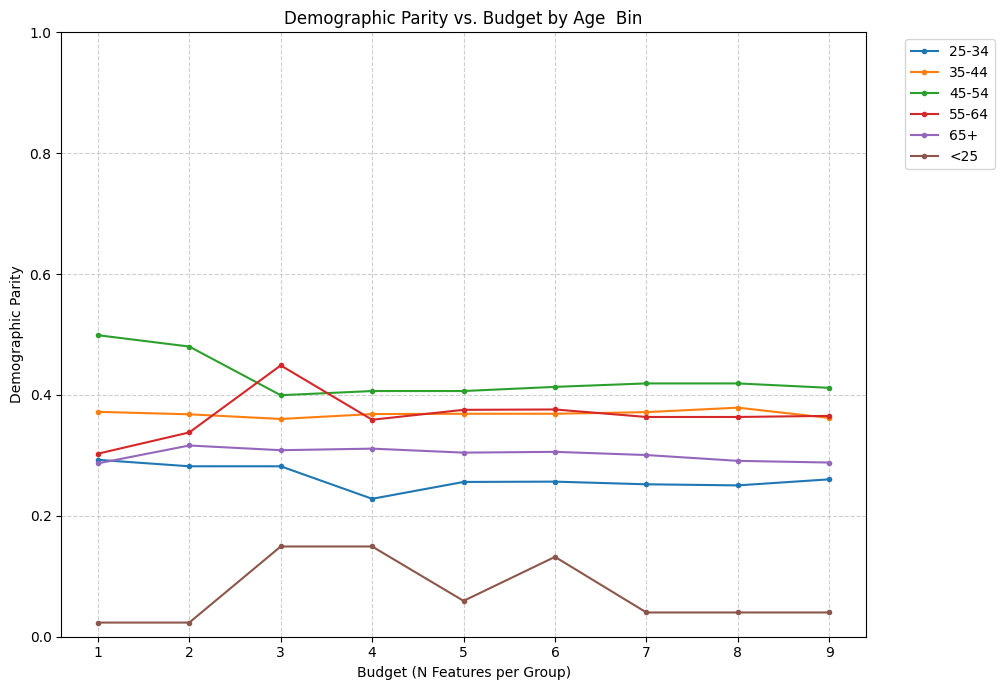


Plotting: Demographic_Parity by race
  - Adding line for: Amer-Indian-Eskimo (Column: Demographic_Parity_race_Amer-Indian-Eskimo)
  - Adding line for: Asian-Pac-Islander (Column: Demographic_Parity_race_Asian-Pac-Islander)
  - Adding line for: Black (Column: Demographic_Parity_race_Black)
  - Adding line for: Other (Column: Demographic_Parity_race_Other)
  - Adding line for: White (Column: Demographic_Parity_race_White)


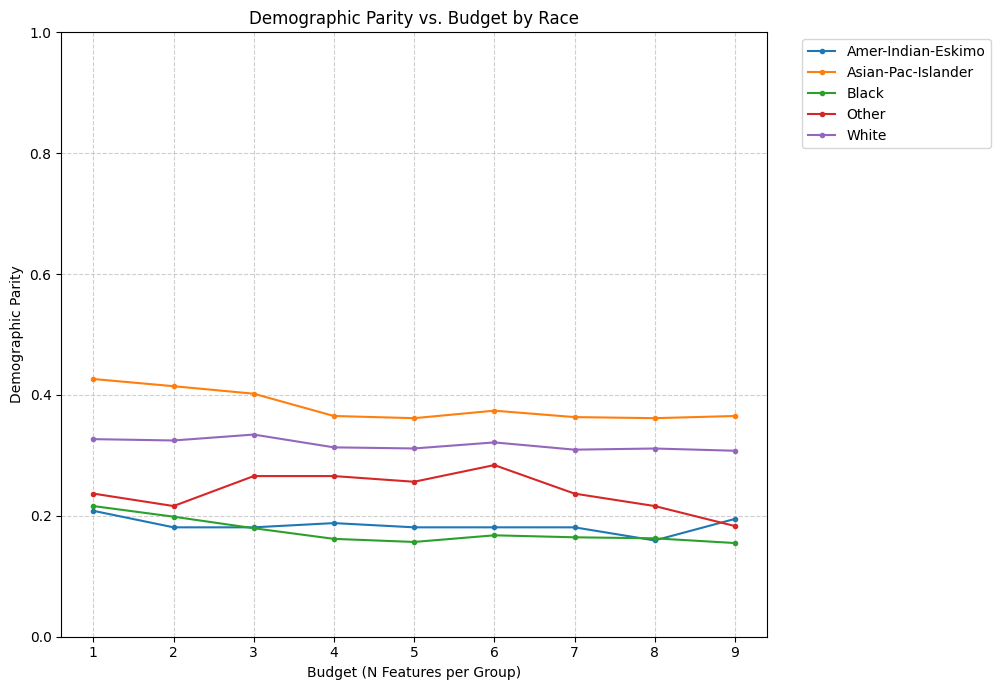


Plotting: Demographic_Parity by sex
  - Adding line for: Female (Column: Demographic_Parity_sex_Female)
  - Adding line for: Male (Column: Demographic_Parity_sex_Male)


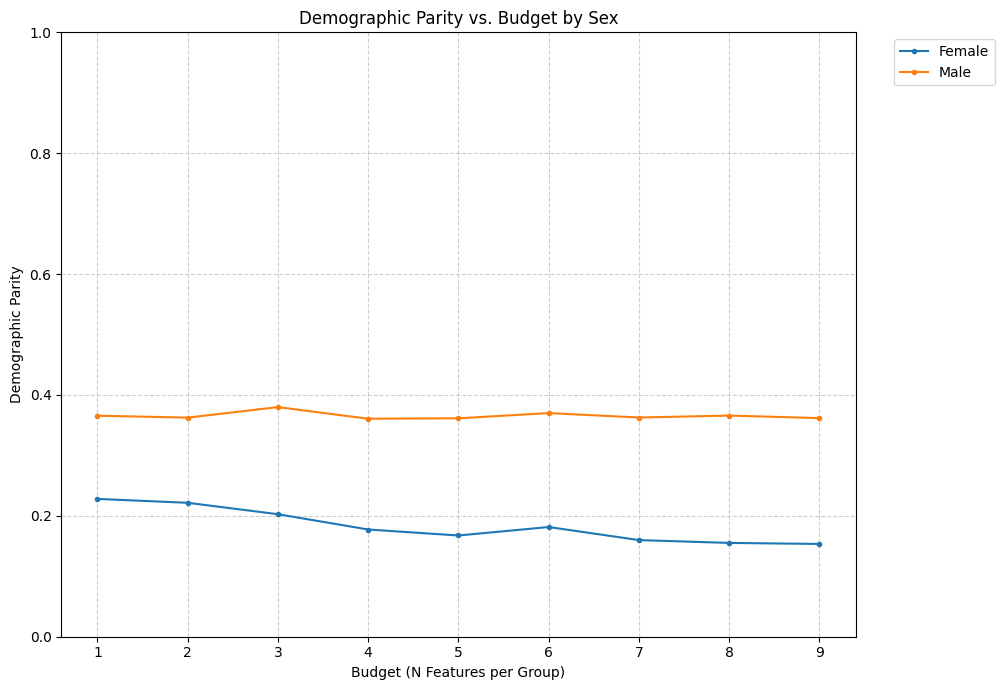


Plotting: Equalized_Odds by age_bin
  - Adding line for: 25-34 (Column: Equalized_Odds_age_bin_25-34)
  - Adding line for: 35-44 (Column: Equalized_Odds_age_bin_35-44)
  - Adding line for: 45-54 (Column: Equalized_Odds_age_bin_45-54)
  - Adding line for: 55-64 (Column: Equalized_Odds_age_bin_55-64)
  - Adding line for: 65+ (Column: Equalized_Odds_age_bin_65plus)
  - Adding line for: <25 (Column: Equalized_Odds_age_bin_lt25)


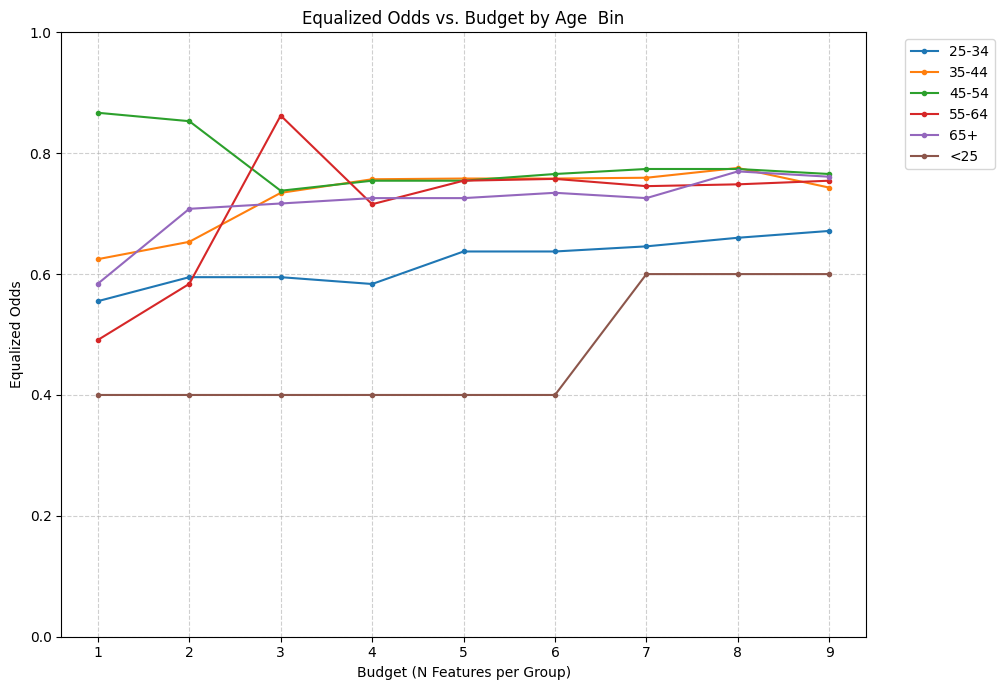


Plotting: Equalized_Odds by race
  - Adding line for: Amer-Indian-Eskimo (Column: Equalized_Odds_race_Amer-Indian-Eskimo)
  - Adding line for: Asian-Pac-Islander (Column: Equalized_Odds_race_Asian-Pac-Islander)
  - Adding line for: Black (Column: Equalized_Odds_race_Black)
  - Adding line for: Other (Column: Equalized_Odds_race_Other)
  - Adding line for: White (Column: Equalized_Odds_race_White)


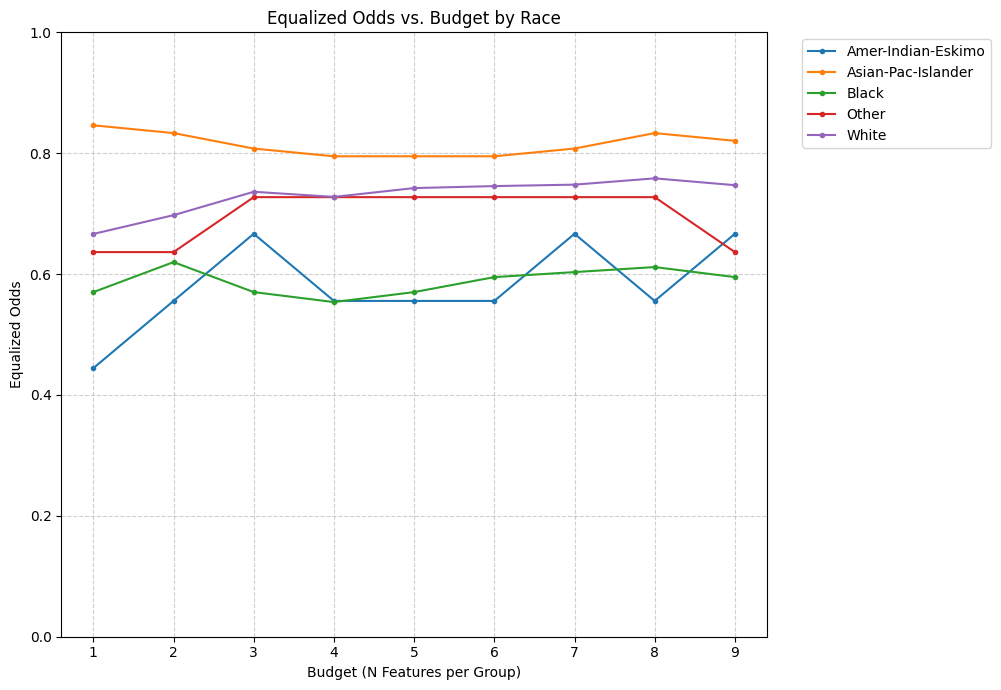


Plotting: Equalized_Odds by sex
  - Adding line for: Female (Column: Equalized_Odds_sex_Female)
  - Adding line for: Male (Column: Equalized_Odds_sex_Male)


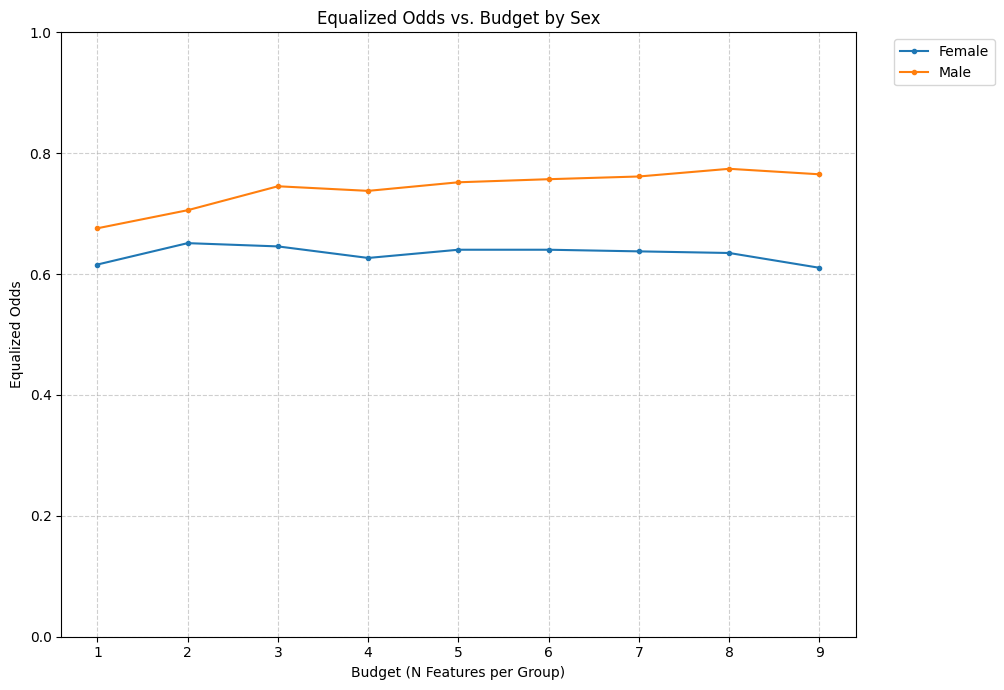


Plotting: FPR by age_bin
  - Adding line for: 25-34 (Column: FPR_age_bin_25-34)
  - Adding line for: 35-44 (Column: FPR_age_bin_35-44)
  - Adding line for: 45-54 (Column: FPR_age_bin_45-54)
  - Adding line for: 55-64 (Column: FPR_age_bin_55-64)
  - Adding line for: 65+ (Column: FPR_age_bin_65plus)
  - Adding line for: <25 (Column: FPR_age_bin_lt25)


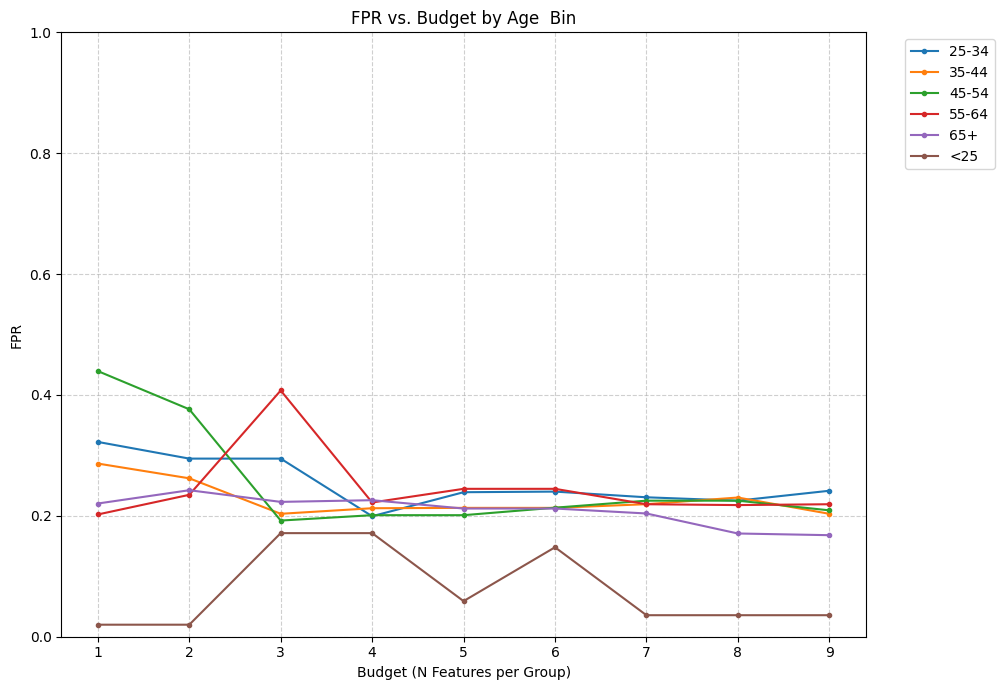


Plotting: FPR by race
  - Adding line for: Amer-Indian-Eskimo (Column: FPR_race_Amer-Indian-Eskimo)
  - Adding line for: Asian-Pac-Islander (Column: FPR_race_Asian-Pac-Islander)
  - Adding line for: Black (Column: FPR_race_Black)
  - Adding line for: Other (Column: FPR_race_Other)
  - Adding line for: White (Column: FPR_race_White)


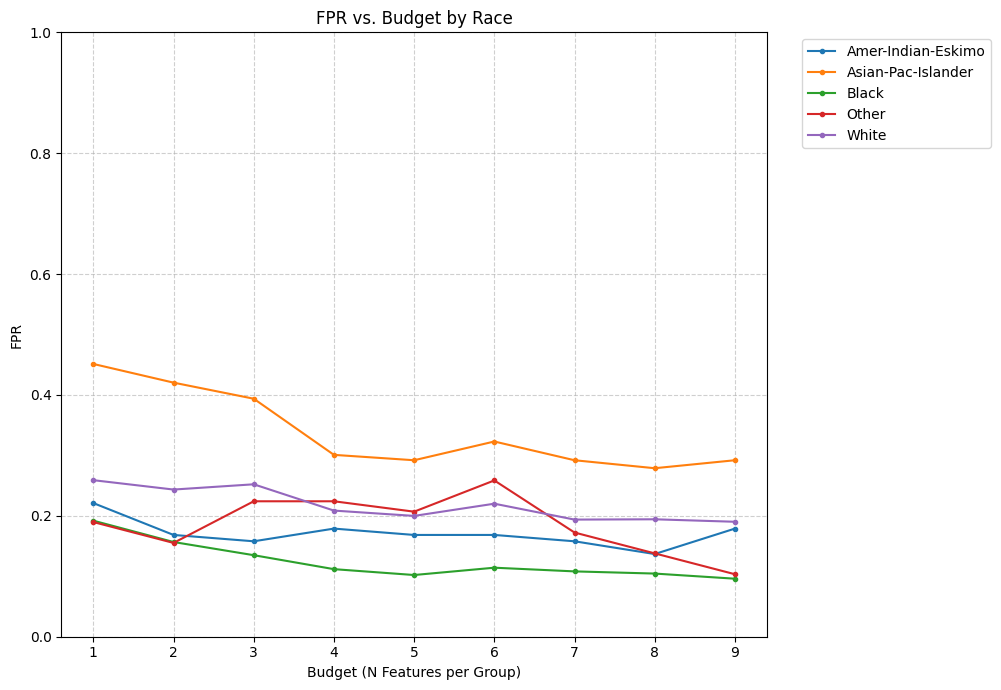


Plotting: FPR by sex
  - Adding line for: Female (Column: FPR_sex_Female)
  - Adding line for: Male (Column: FPR_sex_Male)


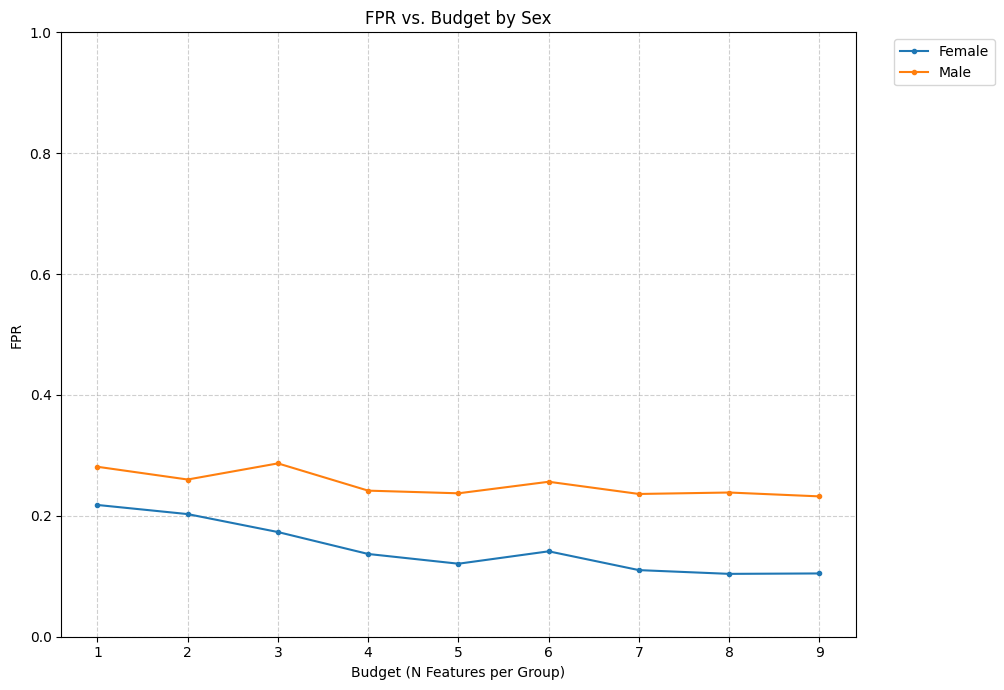


Plotting: Predictive_Parity by age_bin
  - Adding line for: 25-34 (Column: Predictive_Parity_age_bin_25-34)
  - Adding line for: 35-44 (Column: Predictive_Parity_age_bin_35-44)
  - Adding line for: 45-54 (Column: Predictive_Parity_age_bin_45-54)
  - Adding line for: 55-64 (Column: Predictive_Parity_age_bin_55-64)
  - Adding line for: 65+ (Column: Predictive_Parity_age_bin_65plus)
  - Adding line for: <25 (Column: Predictive_Parity_age_bin_lt25)


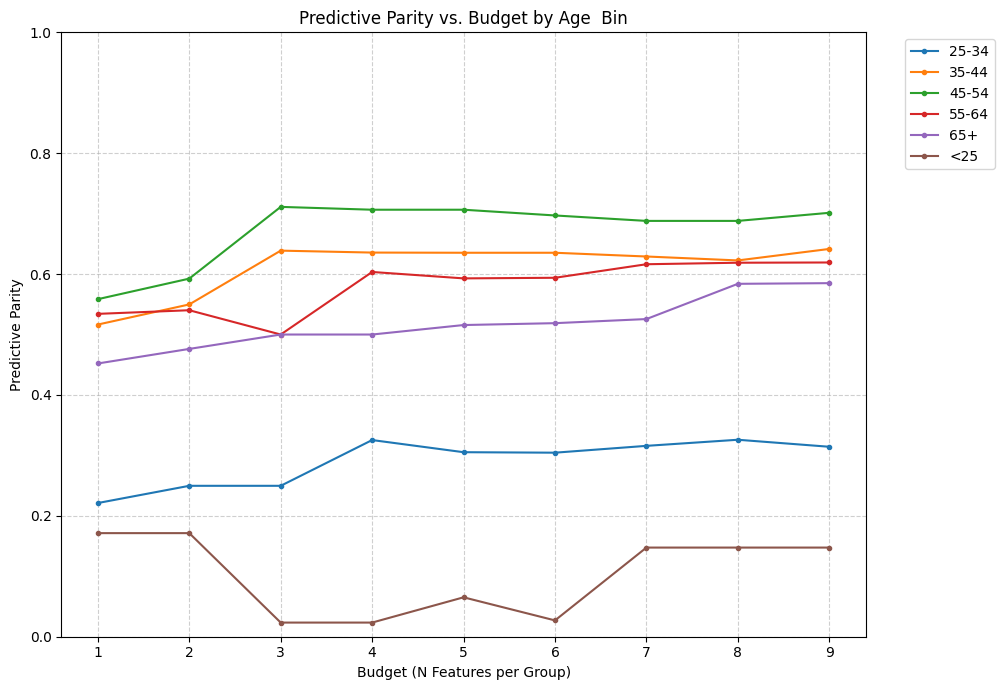


Plotting: Predictive_Parity by race
  - Adding line for: Amer-Indian-Eskimo (Column: Predictive_Parity_race_Amer-Indian-Eskimo)
  - Adding line for: Asian-Pac-Islander (Column: Predictive_Parity_race_Asian-Pac-Islander)
  - Adding line for: Black (Column: Predictive_Parity_race_Black)
  - Adding line for: Other (Column: Predictive_Parity_race_Other)
  - Adding line for: White (Column: Predictive_Parity_race_White)


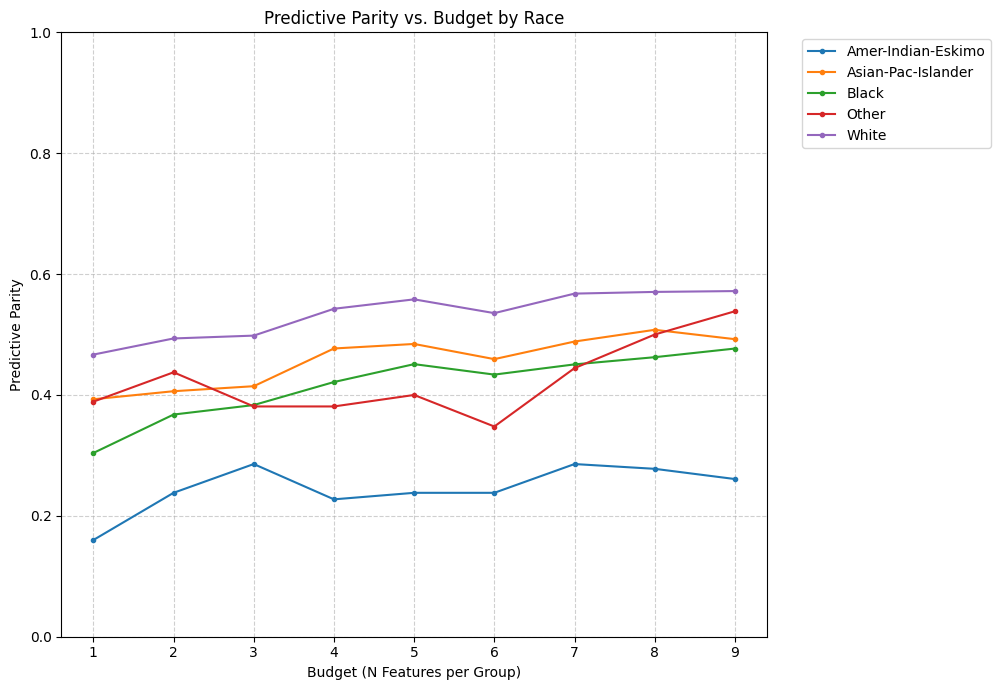


Plotting: Predictive_Parity by sex
  - Adding line for: Female (Column: Predictive_Parity_sex_Female)
  - Adding line for: Male (Column: Predictive_Parity_sex_Male)


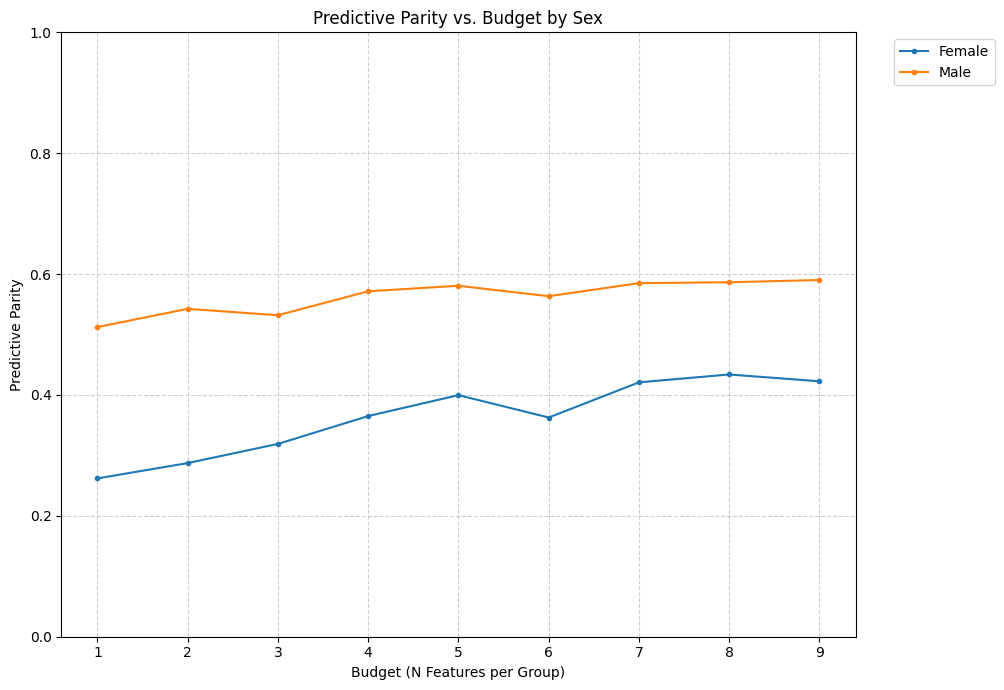


Subgroup plotting complete.


In [9]:
metric_prefixes = ['Demographic_Parity', 'Equalized_Odds', 'FPR', 'Predictive_Parity']
attribute_bases = ['age_bin', 'race', 'sex']

for metric_prefix in metric_prefixes:
    for attribute_base in attribute_bases:
        col_search_prefix = f"{metric_prefix}_{attribute_base}_" 
        
        subgroup_cols = [col for col in df_budget.columns if col.startswith(col_search_prefix)]
        
        if not subgroup_cols:
            print(f"No subgroup columns found starting with: {col_search_prefix}. Skipping plot.")
            continue
            
        plt.figure(figsize=(12, 7)) 
        print(f"\nPlotting: {metric_prefix} by {attribute_base}")
        
        for col_name in subgroup_cols:
            subgroup_label = col_name[len(col_search_prefix):] 
            subgroup_label = subgroup_label.replace('lt', '<').replace('plus','+') 

            print(f"  - Adding line for: {subgroup_label} (Column: {col_name})")    
            plt.plot(df_budget[budget_col], df_budget[col_name], marker='.', linestyle='-', label=subgroup_label) 

        plt.xlabel('Budget (N Features per Group)')
        plt.ylabel(metric_prefix.replace('_', ' ')) 
        title_attribute = attribute_base.replace('_',' ').replace('bin',' Bin').title()
        plt.title(f"{metric_prefix.replace('_',' ')} vs. Budget by {title_attribute}")
        plt.xticks(df_budget[budget_col])
        plt.grid(True, linestyle='--', alpha=0.6)
        plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left") 
        plt.ylim(0.0, 1.0)
        if reverse_budget_axis:
            plt.xlim(df_budget[budget_col].max() + 0.5, df_budget[budget_col].min() - 0.5)
            
        plt.tight_layout(rect=[0, 0, 0.85, 1]) 
        plt.show()

print("\nSubgroup plotting complete.")

  Plotting Demographic Parity for Race Subgroups...
  Plotting Equalized Odds for Race Subgroups...
  Plotting Predictive Parity for Race Subgroups...


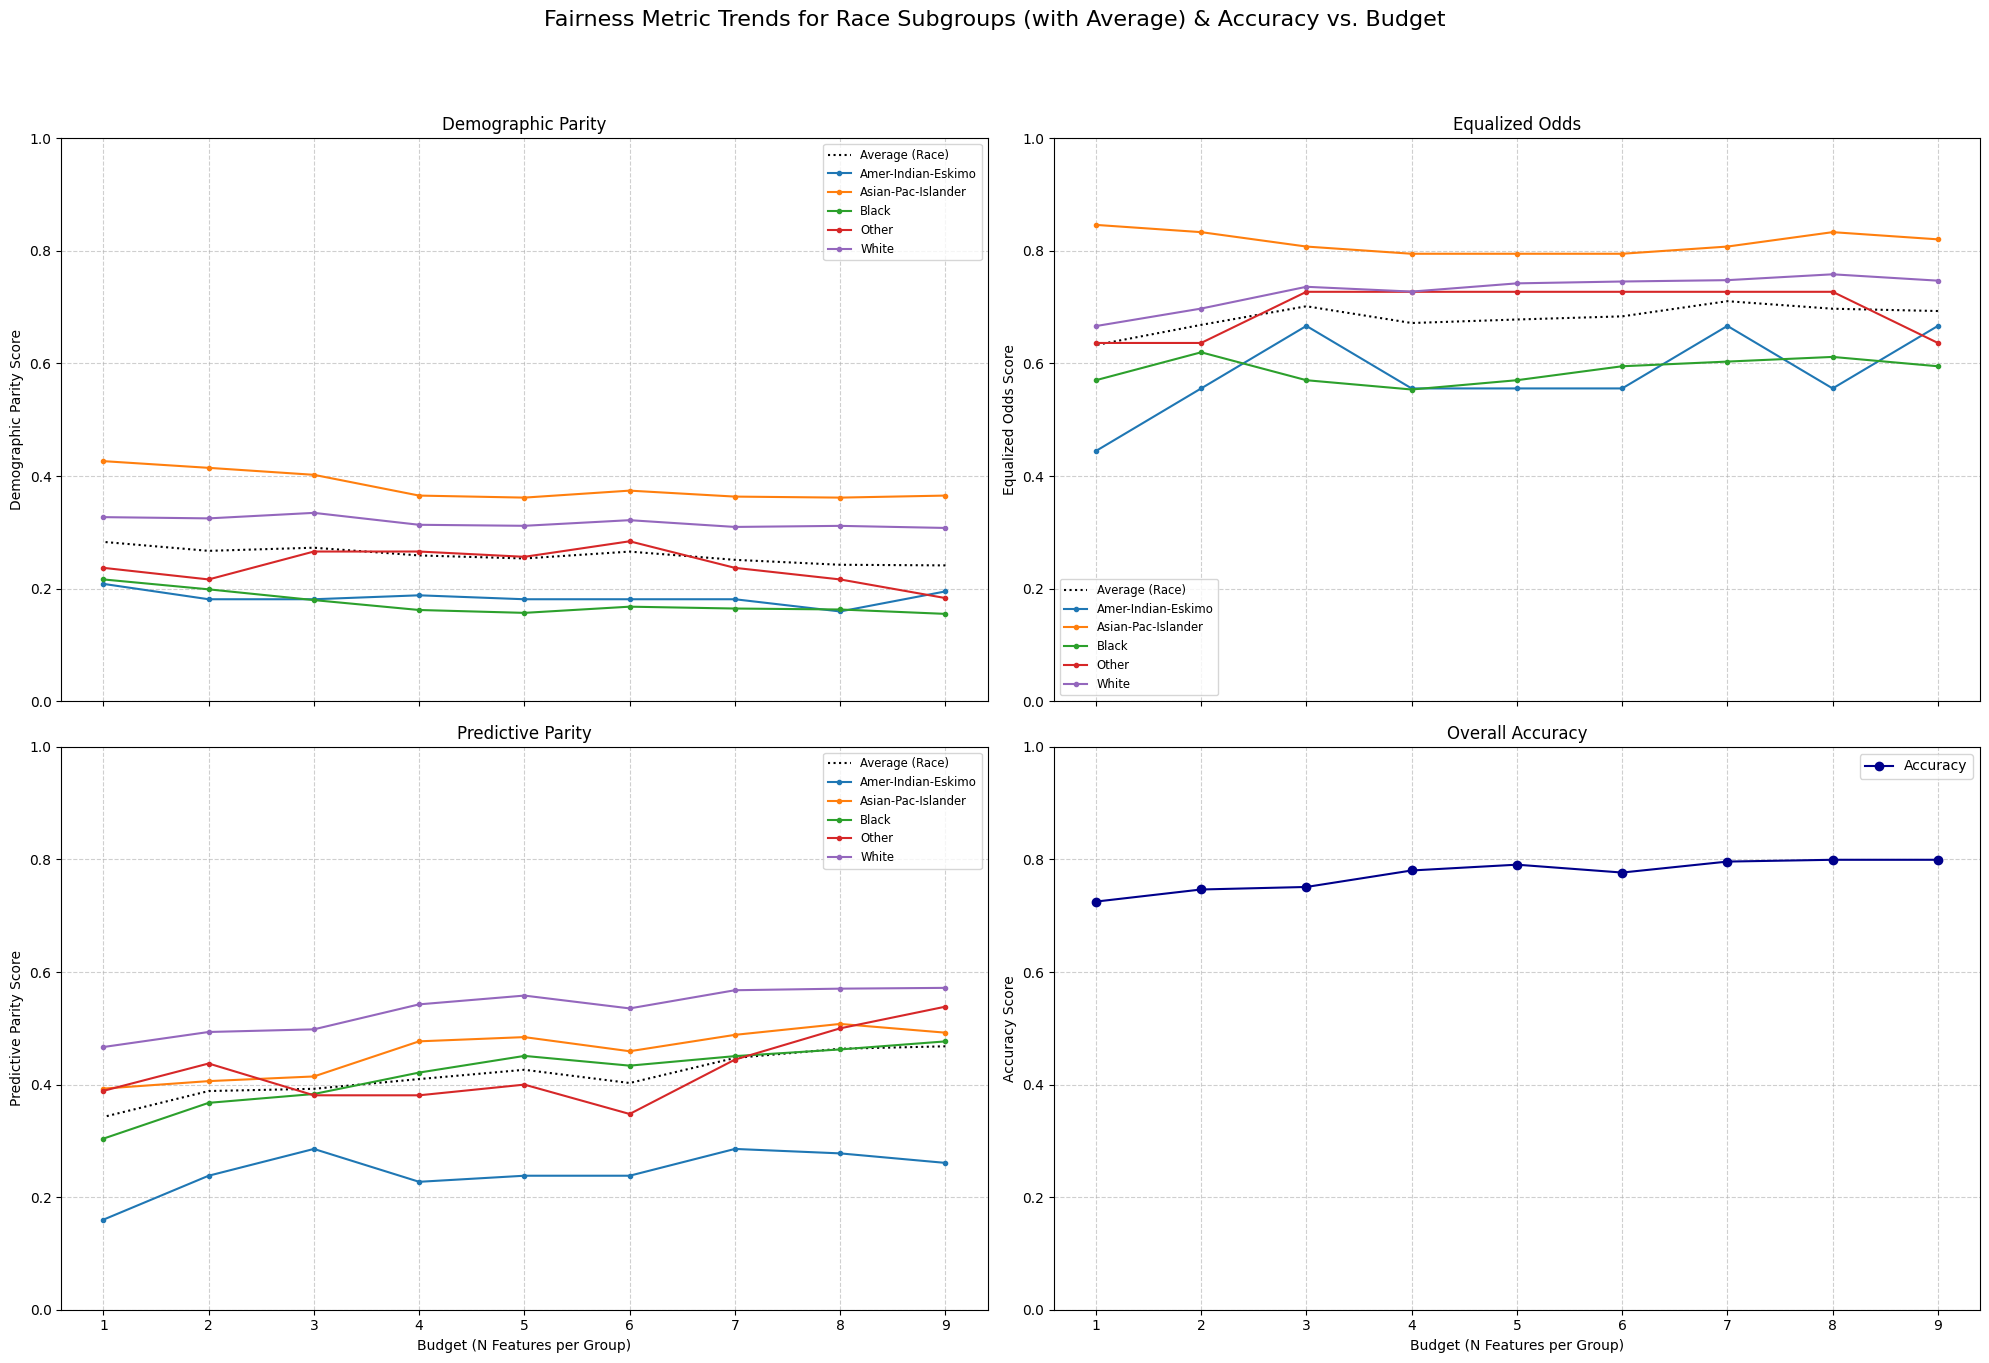


2x2 Race Subgroup plot with averages generation complete.


In [6]:
metrics_for_race_grid = ['Demographic_Parity', 'Equalized_Odds', 'Predictive_Parity']
attribute_to_focus = 'race' 

fig_race, axes_race = plt.subplots(2, 2, figsize=(20, 14), sharex=True, sharey=False) 
fig_race.suptitle(f'Fairness Metric Trends for Race Subgroups (with Average) & Accuracy vs. Budget', fontsize=16, y=1.0)
axes_race = axes_race.flatten() 

subplot_titles_race = metrics_for_race_grid + ['Overall Accuracy'] 

# Loop through the 3 fairness metrics
for i, metric_prefix in enumerate(metrics_for_race_grid):
    ax = axes_race[i] 
    metric_name_cleaned = metric_prefix.replace('_', ' ')
    
    col_search_prefix = f"{metric_prefix}_{attribute_to_focus}_"
    race_subgroup_cols = [col for col in df_budget.columns if col.startswith(col_search_prefix)]
    
    if not race_subgroup_cols:
        print(f"No Race subgroup columns found for metric '{metric_prefix}'. Skipping subplot {i+1}.")
        ax.text(0.5, 0.5, f'No Data for\n{metric_name_cleaned}\n(Race Subgroups)', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, fontsize=12)
        ax.set_title(metric_name_cleaned)
        ax.set_ylim(0.0, 1.0) 
        continue

    print(f"  Plotting {metric_name_cleaned} for Race Subgroups...")
    
    # --- Calculate Average Trend ---
    df_subset_for_avg = df_budget[race_subgroup_cols]
    average_trend = df_subset_for_avg.mean(axis=1, skipna=True) 

    if not average_trend.empty: 
        ax.plot(df_budget[budget_col], average_trend, color='black', linestyle=':', linewidth=1.5, label='Average (Race)') 

    for col_name in race_subgroup_cols:
        subgroup_label = col_name[len(col_search_prefix):] 
        subgroup_label = subgroup_label.replace('lt', '<').replace('plus','+').replace('AmerIndianEskimo', 'AI/Eskimo').replace('AsianPacIslander','API')
        ax.plot(df_budget[budget_col], df_budget[col_name], marker='.', linestyle='-', label=subgroup_label) 

    ax.set_title(metric_name_cleaned)
    ax.set_ylabel(f"{metric_name_cleaned} Score")
    ax.grid(True, linestyle='--', alpha=0.6)
    ax.legend(fontsize='small') 
    ax.set_xticks(df_budget[budget_col]) 
    ax.set_ylim(0.0, 1.0) 

axes_race[2].set_xlabel('Budget (N Features per Group)')
axes_race[3].set_xlabel('Budget (N Features per Group)')

# --- Plot 4: Accuracy Only (Bottom-Right) ---
ax = axes_race[3]
ax.plot(df_budget[budget_col], df_budget[accuracy_col], marker='o', linestyle='-', label='Accuracy', color='darkblue') 
ax.set_title(subplot_titles_race[3]) 
ax.set_ylabel('Accuracy Score')
ax.grid(True, linestyle='--', alpha=0.6)
ax.legend() 
ax.set_ylim(0.0, 1.0) 

if reverse_budget_axis:
    for ax in axes_race:
        ax.set_xlim(df_budget[budget_col].max() + 0.5, df_budget[budget_col].min() - 0.5)

plt.tight_layout(rect=[0, 0.03, 1, 0.96]) 
plt.show()

print("\n2x2 Race Subgroup plot with averages generation complete.")

In [7]:
idx_max_accuracy = df_budget['Accuracy'].idxmax()
idx_min_accuracy = df_budget['Accuracy'].idxmin()

budget_at_max_acc = df_budget.loc[idx_max_accuracy, 'Budget (N)']
budget_at_min_acc = df_budget.loc[idx_min_accuracy, 'Budget (N)']

max_accuracy = df_budget.loc[idx_max_accuracy, 'Accuracy']
min_accuracy = df_budget.loc[idx_min_accuracy, 'Accuracy']
accuracy_diff = max_accuracy - min_accuracy

print(f"\nAccuracy:")
print(f"  - Max: {max_accuracy:.4f} (at Budget N={budget_at_max_acc})")
print(f"  - Min: {min_accuracy:.4f} (at Budget N={budget_at_min_acc})")
print(f"  - Range (Max - Min): {accuracy_diff:.4f}")


disparity_metrics = ['Demographic_Parity_Disparity', 'Equalized_Odds_Disparity', 'Predictive_Parity_Disparity']
attribute_bases = ['age_bin', 'race', 'sex']

for attribute_base in attribute_bases:
    attribute_title = attribute_base.replace('_',' ').replace('bin',' Bin').title()
    print(f"\n--- Attribute: {attribute_title} ---")
    
    for metric_base in disparity_metrics:
        col_name = f"{metric_base}_{attribute_base}"
        metric_title = metric_base.replace('_',' ')
        print(f"  Metric: {metric_title}")
        
        if col_name not in df_budget.columns:
            print(f"    - Column '{col_name}' not found. Skipping.")
            continue
            
        try:
            valid_series = df_budget[col_name].dropna()
            if valid_series.empty:
                print("    - All values are NaN. Cannot find Max/Min.")
                continue
                
            idx_max_val = valid_series.idxmax()
            idx_min_val = valid_series.idxmin()
            
            max_val = df_budget.loc[idx_max_val, col_name]
            min_val = df_budget.loc[idx_min_val, col_name]
            budget_at_max = df_budget.loc[idx_max_val, 'Budget (N)']
            budget_at_min = df_budget.loc[idx_min_val, 'Budget (N)']
            diff = max_val - min_val 
            print(f"    - Max Disparity: {max_val:.4f} (at Budget N={budget_at_max})")
            print(f"    - Min Disparity: {min_val:.4f} (at Budget N={budget_at_min})")
            print(f"    - Range (Max - Min): {diff:.4f}")

        except KeyError:
            print(f"    - Error accessing column or Budget (N) for indices: {col_name}")
        except Exception as e:
             print(f"    - Error processing column '{col_name}': {e}")

print("\n--- Calculation Complete ---")


Accuracy:
  - Max: 0.7995 (at Budget N=9)
  - Min: 0.7252 (at Budget N=1)
  - Range (Max - Min): 0.0743

--- Attribute: Age  Bin ---
  Metric: Demographic Parity Disparity
    - Max Disparity: 0.4755 (at Budget N=1)
    - Min Disparity: 0.2573 (at Budget N=4)
    - Range (Max - Min): 0.2182
  Metric: Equalized Odds Disparity
    - Max Disparity: 0.4669 (at Budget N=1)
    - Min Disparity: 0.1947 (at Budget N=8)
    - Range (Max - Min): 0.2722
  Metric: Predictive Parity Disparity
    - Max Disparity: 0.6878 (at Budget N=3)
    - Min Disparity: 0.3871 (at Budget N=1)
    - Range (Max - Min): 0.3007

--- Attribute: Race ---
  Metric: Demographic Parity Disparity
    - Max Disparity: 0.2335 (at Budget N=2)
    - Min Disparity: 0.1989 (at Budget N=7)
    - Range (Max - Min): 0.0346
  Metric: Equalized Odds Disparity
    - Max Disparity: 0.4017 (at Budget N=1)
    - Min Disparity: 0.2044 (at Budget N=7)
    - Range (Max - Min): 0.1973
  Metric: Predictive Parity Disparity
    - Max Dispari

In [35]:
df_feature_select  = pd.read_excel("feature_gridsearch_fairness_results.xlsx")
column_names = df_feature_select .columns.tolist()
print("\nColumn Names:")
for i, col_name in enumerate(column_names):
    print(f"{i+1}. {col_name}")


Column Names:
1. Num Features
2. Accuracy
3. Demographic_Parity_Disparity_age_bin
4. Equalized_Odds_Disparity_age_bin
5. Predictive_Parity_Disparity_age_bin
6. Demographic_Parity_Disparity_race
7. Equalized_Odds_Disparity_race
8. Predictive_Parity_Disparity_race
9. Demographic_Parity_Disparity_sex
10. Equalized_Odds_Disparity_sex
11. Predictive_Parity_Disparity_sex
12. Features Used
13. Demographic_Parity_age_bin_2534
14. Demographic_Parity_age_bin_3544
15. Demographic_Parity_age_bin_4554
16. Demographic_Parity_age_bin_5564
17. Demographic_Parity_age_bin_65plus
18. Demographic_Parity_age_bin_lt25
19. Demographic_Parity_race_AmerIndianEskimo
20. Demographic_Parity_race_AsianPacIslander
21. Demographic_Parity_race_Black
22. Demographic_Parity_race_Other
23. Demographic_Parity_race_White
24. Demographic_Parity_sex_Female
25. Demographic_Parity_sex_Male
26. Equalized_Odds_age_bin_2534
27. Equalized_Odds_age_bin_3544
28. Equalized_Odds_age_bin_4554
29. Equalized_Odds_age_bin_5564
30. Equal

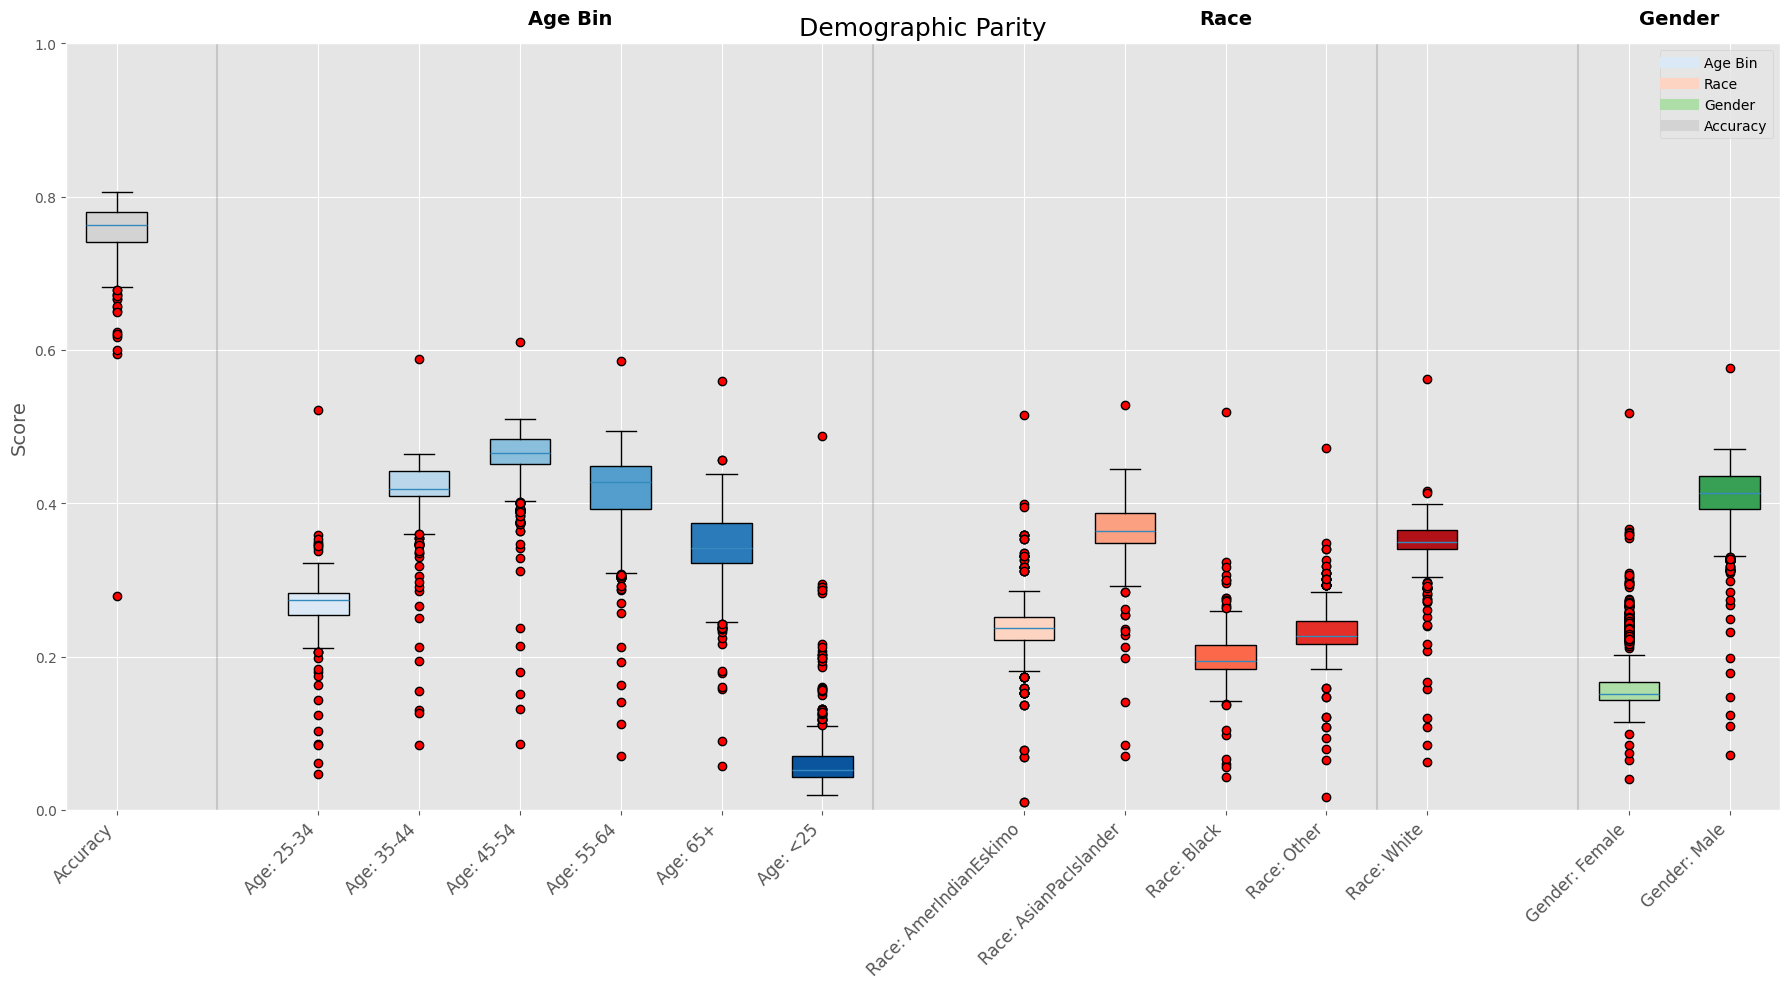

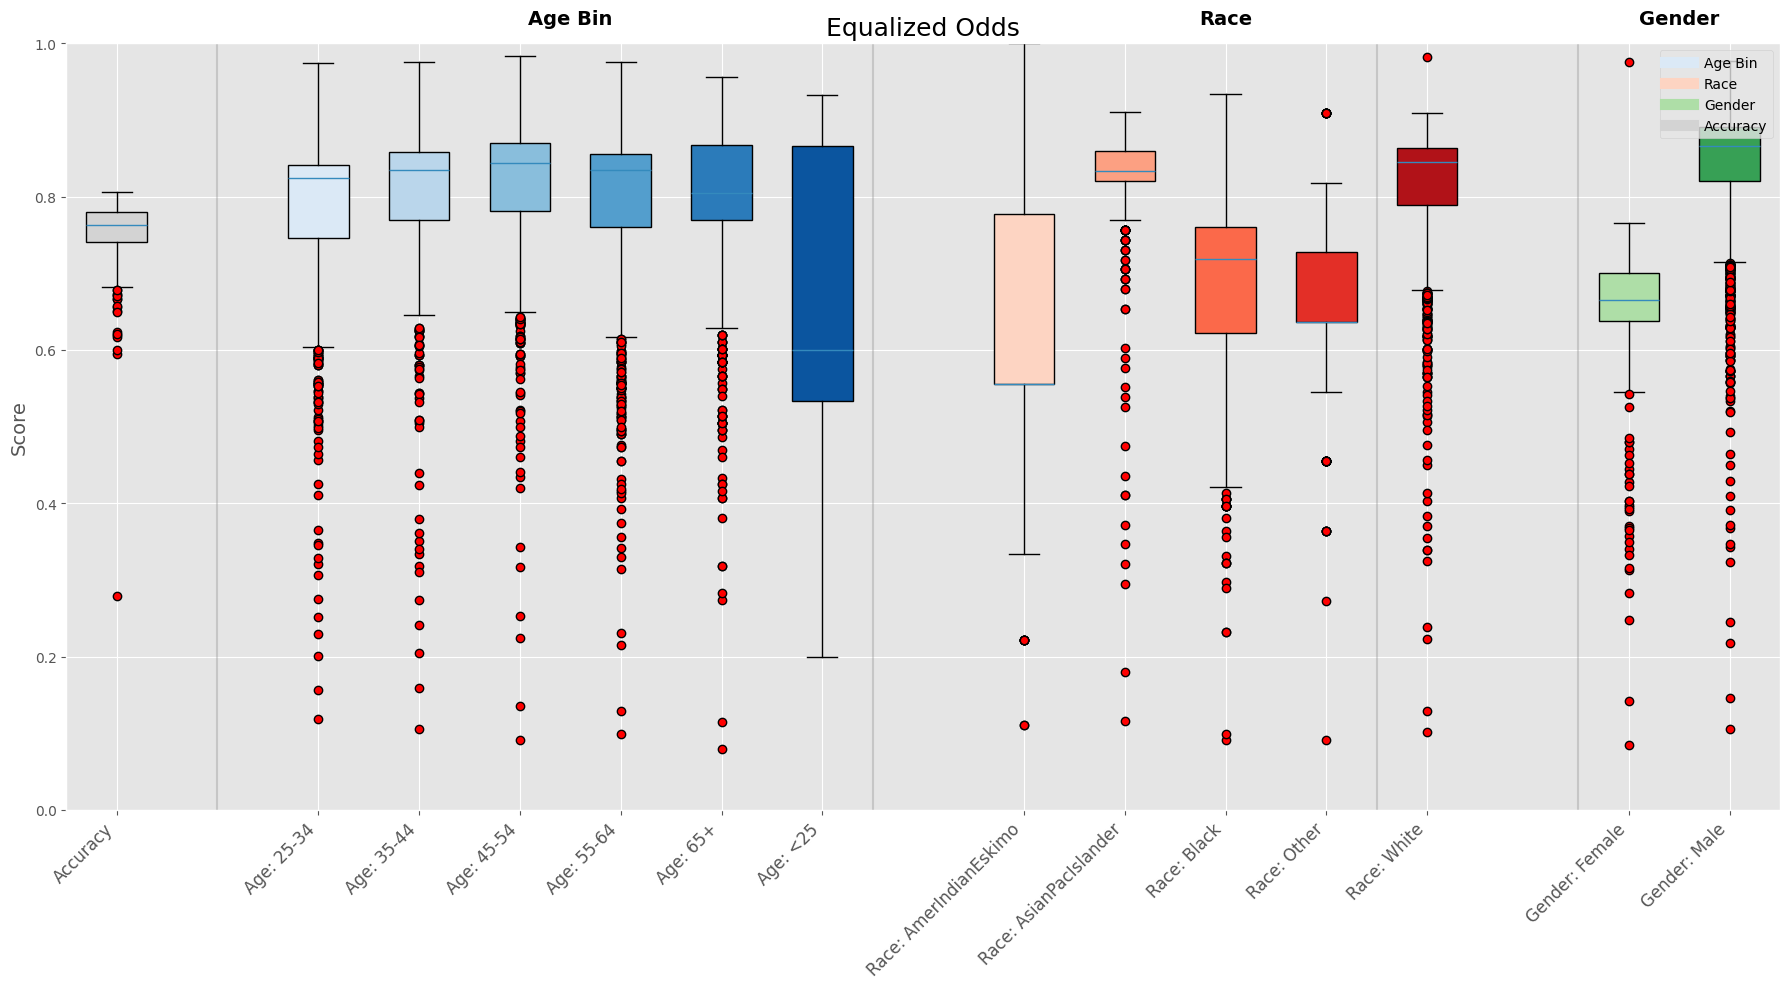

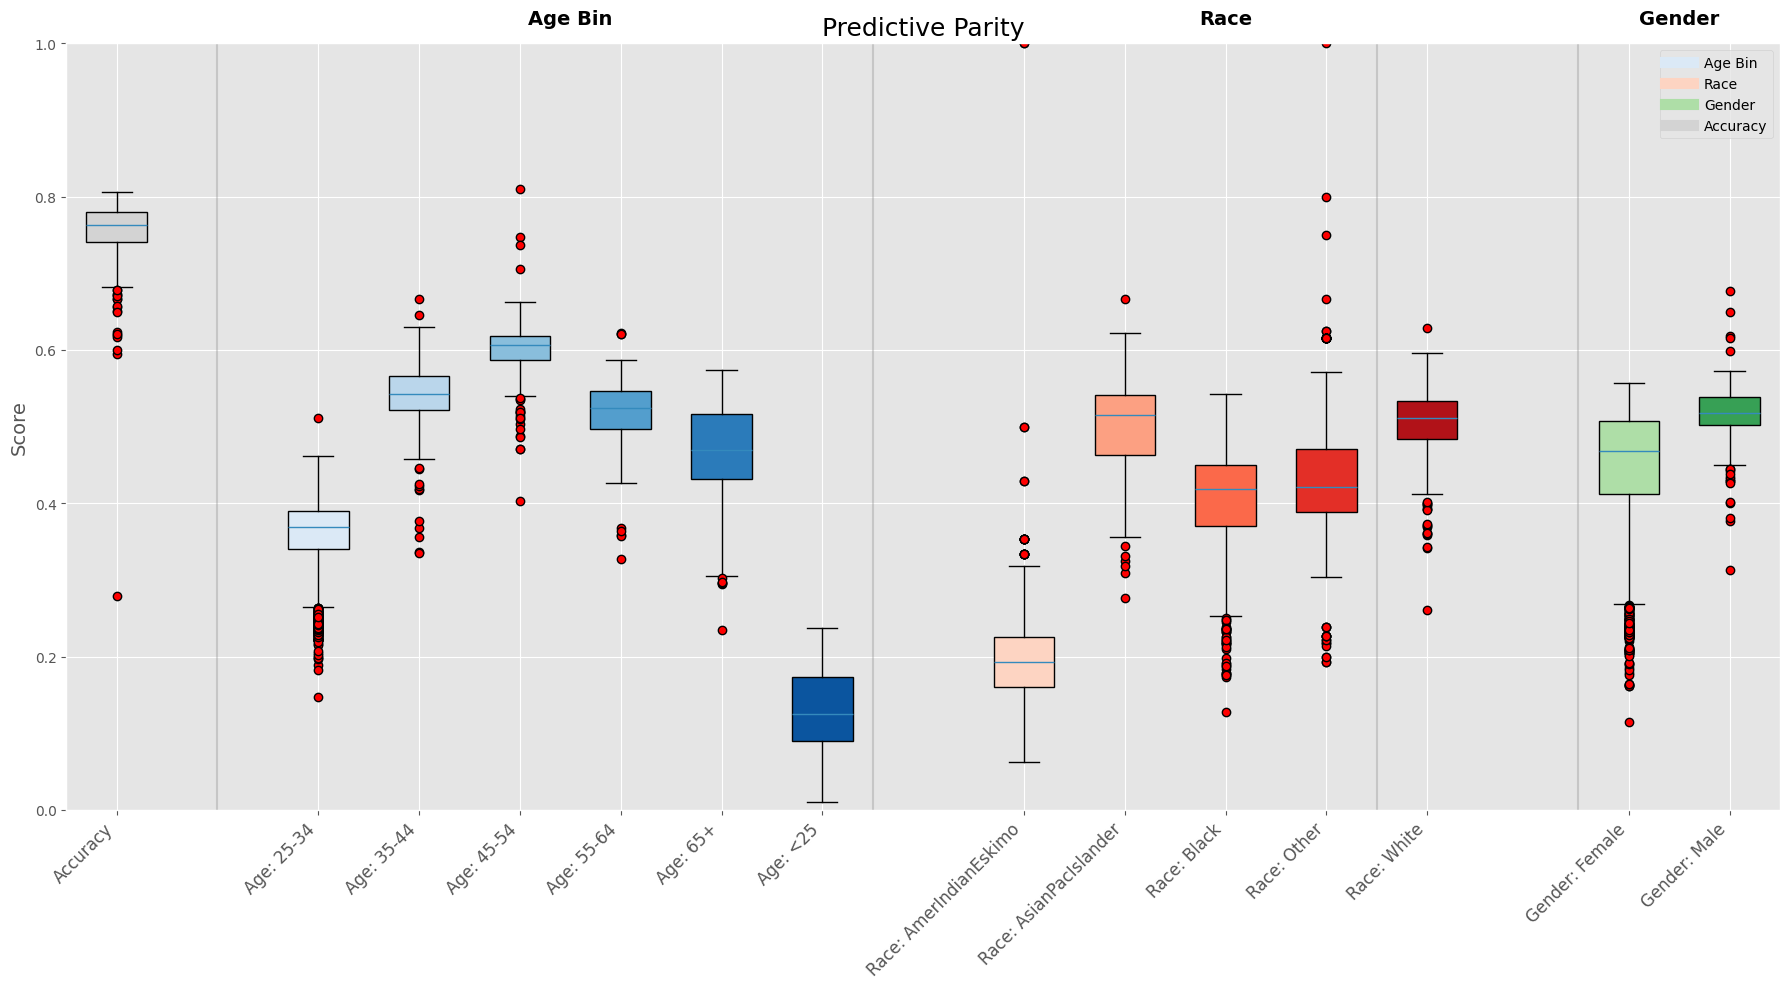

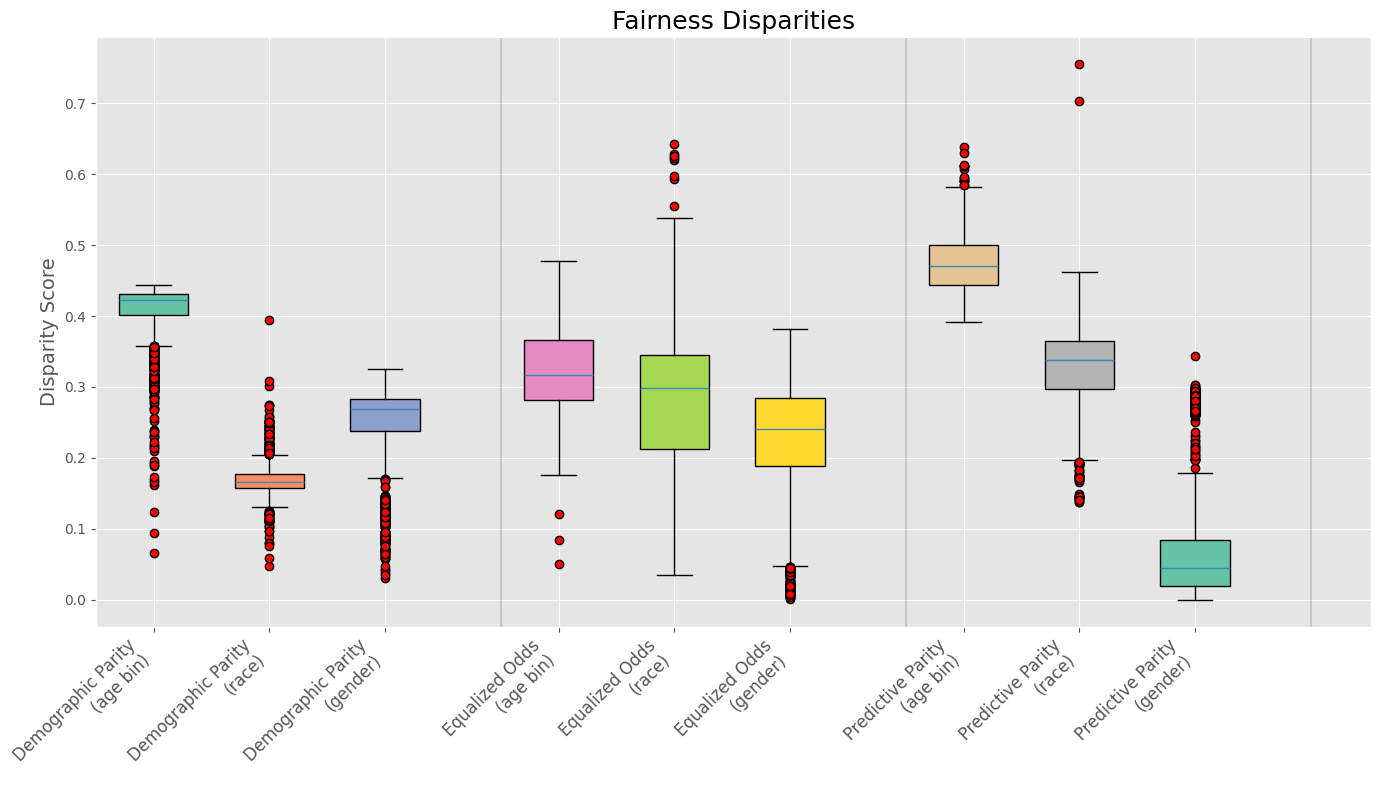

True

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Extract demographic groups
def extract_demographics(df):
    """Extract demographic groups from column names"""
    age_bins = sorted(list(set([col.split('_')[-1] for col in df.columns 
                          if 'age_bin_' in col and 'Disparity' not in col 
                          and 'FPR' not in col and 'Group_Size' not in col])))
    
    races = sorted(list(set([col.split('_')[-1] for col in df.columns 
                       if 'race_' in col and 'Disparity' not in col 
                       and 'FPR' not in col and 'Group_Size' not in col])))
    
    sexes = sorted(list(set([col.split('_')[-1] for col in df.columns 
                       if 'sex_' in col and 'Disparity' not in col 
                       and 'FPR' not in col and 'Group_Size' not in col])))
    
    return {'age_bins': age_bins, 'races': races, 'sexes': sexes}

# Function to format demographic labels
def format_label(label, demo_type):
    """Format demographic labels to be more readable"""
    if demo_type == 'age_bin':
        if label == 'lt25':
            return '<25'
        elif label == '65plus':
            return '65+'
        else:
            # Format age ranges with a hyphen (e.g., 25-34)
            start = label[:2]
            end = label[2:]
            return f'{start}-{end}'
    return label

# Create colorful boxplots with gender label
def create_colorful_boxplots(df):
    """Create colorful boxplots with all groups in a single plot, using 'Gender' instead of 'Sex'"""
    metrics = ['Demographic_Parity', 'Equalized_Odds', 'Predictive_Parity']
    demographics = extract_demographics(df)
    
    # Set a colorful style
    plt.style.use('ggplot')
    
    # Color palettes for different demographic types
    color_palettes = {
        'age_bin': sns.color_palette("Blues", len(demographics['age_bins'])),
        'race': sns.color_palette("Reds", len(demographics['races'])),
        'sex': sns.color_palette("Greens", len(demographics['sexes']))
    }
    
    # Create a single combined plot for each metric
    for metric in metrics:
        plt.figure(figsize=(18, 10))
        
        # Setup data for boxplot
        boxplot_data = []
        labels = []
        colors = []
        positions = []
        
        # Add accuracy as reference
        boxplot_data.append(df['Accuracy'])
        labels.append('Accuracy')
        colors.append('lightgray')
        positions.append(0)
        
        current_pos = 2  # Start position after accuracy with a gap
        
        # Add data for each demographic type
        for demo_type in ['age_bin', 'race', 'sex']:
            demo_type_plural = {'age_bin': 'age_bins', 'race': 'races', 'sex': 'sexes'}[demo_type]
            demo_values = demographics[demo_type_plural]
            palette = color_palettes[demo_type]
            
            # Add demographic values
            for i, demo_value in enumerate(demo_values):
                col_name = f"{metric}_{demo_type}_{demo_value}"
                if col_name in df.columns:
                    boxplot_data.append(df[col_name])
                    
                    # Format the label
                    formatted_label = format_label(demo_value, demo_type)
                    if demo_type == 'age_bin':
                        labels.append(f"Age: {formatted_label}")
                    elif demo_type == 'race':
                        labels.append(f"Race: {formatted_label}")
                    else:  # sex - now labeled as gender
                        labels.append(f"Gender: {formatted_label}")
                    
                    colors.append(palette[i])
                    positions.append(current_pos)
                    current_pos += 1
            
            current_pos += 1  # Add gap between demographic types
        
        # Create boxplot
        bp = plt.boxplot(boxplot_data, positions=positions, patch_artist=True, 
                        showfliers=True, widths=0.6)
        
        # Color the boxes
        for box, color in zip(bp['boxes'], colors):
            box.set(facecolor=color)
        
        # Make outliers more visible
        for flier in bp['fliers']:
            flier.set(marker='o', markerfacecolor='red', markersize=6, 
                    markeredgecolor='black', markeredgewidth=1)
        
        # Customize plot
        plt.title(f'{metric.replace("_", " ")}', fontsize=18)
        plt.ylabel('Score', fontsize=14)
        plt.ylim(0, 1.0)
        
        # Set x-axis labels
        plt.xticks(positions, labels, rotation=45, ha='right', fontsize=12)
        
        # Add vertical separators between demographic groups
        group_boundaries = [1]  # After accuracy
        pos = 2  # Start after accuracy (with gap)
        for demo_type in ['age_bin', 'race', 'sex']:
            demo_type_plural = {'age_bin': 'age_bins', 'race': 'races', 'sex': 'sexes'}[demo_type]
            pos += len(demographics[demo_type_plural])
            group_boundaries.append(pos - 0.5)  # Place line between groups
        
        # Add vertical lines to separate groups
        for boundary in group_boundaries:
            plt.axvline(x=boundary, color='gray', linestyle='-', alpha=0.3)
        
        # Add group labels above the plot (with "Gender" instead of "Sex")
        demo_labels_pos = []
        pos = 2  # Start after accuracy (with gap)
        for demo_type in ['age_bin', 'race', 'sex']:
            demo_type_plural = {'age_bin': 'age_bins', 'race': 'races', 'sex': 'sexes'}[demo_type]
            demo_values = demographics[demo_type_plural]
            
            if demo_values:
                center = pos + (len(demo_values) - 1) / 2
                
                # Use "Gender" instead of "Sex" for the label
                if demo_type == 'sex':
                    label = 'Gender'
                else:
                    label = demo_type.replace('_', ' ').title()
                
                demo_labels_pos.append((center, label))
                pos += len(demo_values) + 1  # Move to next group with gap
        
        # Add group labels
        for pos, label in demo_labels_pos:
            plt.annotate(label, xy=(pos, 1.02), xycoords=('data', 'axes fraction'),
                       ha='center', va='bottom', fontsize=14, fontweight='bold')
        
        # Add legend for demographic types (with "Gender" instead of "Sex")
        legend_elements = [
            plt.Line2D([0], [0], color=color_palettes['age_bin'][0], lw=8, label='Age Bin'),
            plt.Line2D([0], [0], color=color_palettes['race'][0], lw=8, label='Race'),
            plt.Line2D([0], [0], color=color_palettes['sex'][0], lw=8, label='Gender'),
            plt.Line2D([0], [0], color='lightgray', lw=8, label='Accuracy')
        ]
        plt.legend(handles=legend_elements, loc='upper right')
        
        plt.tight_layout()
        plt.show()
    
    # Create disparity boxplot - FIXED to properly show "gender" instead of "sex"
    plt.figure(figsize=(14, 8))
    
    # Setup data
    boxplot_data = []
    labels = []
    colors = []
    positions = []
    
    current_pos = 0
    disparity_palette = sns.color_palette("Set2", 9)  # Colorful palette for disparities
    
    # Create a mapping for demographic types to display names
    demo_display_names = {
        'age_bin': 'age bin',
        'race': 'race',
        'sex': 'gender'  # Change 'sex' to 'gender' in the display name
    }
    
    # Add data for each metric and demographic type
    for i, metric in enumerate(metrics):
        for j, demo_type in enumerate(['age_bin', 'race', 'sex']):
            col_name = f"{metric}_Disparity_{demo_type}"
            if col_name in df.columns:
                boxplot_data.append(df[col_name])
                
                # Create formatted label with "gender" instead of "sex"
                metric_short = metric.replace('_', ' ')
                demo_short = demo_display_names[demo_type]
                
                labels.append(f"{metric_short}\n({demo_short})")
                
                # Assign color - use same color for same metric
                colors.append(disparity_palette[i*3 + j])
                
                positions.append(current_pos)
                current_pos += 1
        
        current_pos += 0.5  # Add small gap between metrics
    
    # Create boxplot
    bp = plt.boxplot(boxplot_data, positions=positions, patch_artist=True, 
                   showfliers=True, widths=0.6)
    
    # Color the boxes
    for box, color in zip(bp['boxes'], colors):
        box.set(facecolor=color)
    
    # Make outliers more visible
    for flier in bp['fliers']:
        flier.set(marker='o', markerfacecolor='red', markersize=6, 
                markeredgecolor='black', markeredgewidth=1)
    
    # Customize plot
    plt.title('Fairness Disparities', fontsize=18)
    plt.ylabel('Disparity Score', fontsize=14)
    
    # Set x-axis labels
    plt.xticks(positions, labels, rotation=45, ha='right', fontsize=12)
    
    # Add vertical separators between metrics
    separator_pos = -0.5  # Start before first group
    for metric in metrics:
        separator_pos += 3.5  # Each metric has 3 demographic types plus gap
        plt.axvline(x=separator_pos, color='gray', linestyle='-', alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    return True

# Run the function
create_colorful_boxplots(df_feature_select)